In [8]:
import numpy as np

# # Load the .npz file
# data = np.load('/home/ihossain/ISMAIL/Datasets/data/gen_apigraph_drebin/2018-12_selected.npz')

# print(data.files)

In [9]:
# api_graph_families = np.unique(data['y_mal_family'])

In [ ]:
with open('/home/ihossain/ISMAIL/Datasets/data/CDD/results/lambda_top_100_families.txt', 'r') as file:
    top100 = [line.strip() for line in file.readlines()]

In [11]:
# A = set(api_graph_families)
# B = set(top100)
# print(len(A.intersection(B)))

In [12]:
# # Find the indices where the families match the target list
# indices = [i for i, family in enumerate(data['y_mal_family']) if family in top100]

# # Extract rows from data_X based on the indices
# X_train = data['X_train'][indices]
# y_train = data['y_train'][indices]

In [13]:
# Load the .npz file of 2012
year_features = {}
family_indices = {}

# data = np.load('/home/ihossain/ISMAIL/Datasets/data/gen_apigraph_drebin/2012-01to2012-12_selected.npz')

# # Find the indices where the families match the target list

# for i, family in enumerate(data['y_mal_family']):
#     if family in top100:
#         family_indices.setdefault(family, []).append(i)

# # Extract rows from data_X based on the indices
# # year_features[2012] = data['X_train'][indices]

# # Populate family_features dictionary
# # for i in indices:
# #     family = data['y_mal_family'][i]
# #     family_features.setdefault(family, []).append(data['X_train'][i])

family_features = {}
# for family in family_indices.keys():
#     if family not in family_features:
#         family_features[family] = {}
#     family_features[family][2012] = data['X_train'][family_indices[family]]

In [14]:
def get_year_data(year, month):
    # Load the .npz file
    data = np.load(f'/home/ihossain/ISMAIL/Datasets/data/gen_apigraph_drebin/{year}-{month:02d}_selected.npz')
    
    family_indices = {}
    for i, family in enumerate(data['y_mal_family']):
        if family in top100:
            family_indices.setdefault(family, []).append(i)

    # Extract rows from data_X based on the indices
    # year_features[2012] = data['X_train'][indices]

    # Populate family_features dictionary
    # for i in indices:
    #     family = data['y_mal_family'][i]
    #     family_features.setdefault(family, []).append(data['X_train'][i])

    # family_features = {}
    # Update family_features using numpy concatenation
    for family in family_indices.keys():
        new_features = data['X_train'][family_indices[family]]
        if family in family_features:
            if year in family_features[family]:
                family_features[family][year] = np.concatenate([family_features[family][year], new_features], axis=0)
            else:
                family_features[family][year] = new_features
        else:
            family_features[family] = {year: new_features}

In [15]:

for year in range(2013, 2019):
    X_features_list = []
    for month in range(1, 13):
        X_features = get_year_data(year, month)
        # X_features_list.append(X_features)

    # year_features[year] = np.concatenate(X_features_list, axis=0)

In [16]:
# for year in range(2012, 2019):
#     print(f"Size of sample set of the year {year}: ", len(year_features[year]))

In [17]:
len(family_features.keys())

80

In [18]:
for family in family_features.keys():
    print(f"Total years in {family}: ", len(family_features[family]))
    for year in family_features[family].keys():
        print(f"Size of sample set in {family}: ", len(family_features[family][year]))

Total years in airpush:  6
Size of sample set in airpush:  1105
Size of sample set in airpush:  1105
Size of sample set in airpush:  291
Size of sample set in airpush:  24
Size of sample set in airpush:  11
Size of sample set in airpush:  8
Total years in plankton:  4
Size of sample set in plankton:  165
Size of sample set in plankton:  10
Size of sample set in plankton:  4
Size of sample set in plankton:  4
Total years in fakeinst:  6
Size of sample set in fakeinst:  646
Size of sample set in fakeinst:  154
Size of sample set in fakeinst:  49
Size of sample set in fakeinst:  296
Size of sample set in fakeinst:  33
Size of sample set in fakeinst:  27
Total years in youmi:  6
Size of sample set in youmi:  187
Size of sample set in youmi:  120
Size of sample set in youmi:  48
Size of sample set in youmi:  16
Size of sample set in youmi:  14
Size of sample set in youmi:  17
Total years in opfake:  6
Size of sample set in opfake:  233
Size of sample set in opfake:  142
Size of sample set i

In [19]:
family_features2 = {}

for family in family_features.keys():
    for year in family_features[family].keys():
        new_features = family_features[family][year]
        if family in family_features2:
            family_features2[family] = np.concatenate([family_features2[family], new_features], axis=0)
        else:
            family_features2[family] = new_features


In [20]:
len(family_features2.keys())

80

In [21]:
family_features2 = {family: features for family, features in family_features2.items() if len(features) >= 10}

In [22]:
len(family_features2.keys())

58

In [23]:
# Create a dictionary to store the split data
family_data_splits = {}

# Iterate through each family in family_features2
for family, features in family_features2.items():
    # Split the features into 10 equal groups
    splits = np.array_split(features, 10)
    family_data_splits[family] = splits

# Example: Access the splits for a specific family
print(f"Number of splits for 'droidkungfu': {len(family_data_splits['droidkungfu'])}")


Number of splits for 'droidkungfu': 10


In [24]:
def calculate_jaccard_similarity(A, B):
    """
    Calculate Jaccard similarity between two binary arrays.
    
    Args:
        A: First binary numpy array
        B: Second binary numpy array
        
    Returns:
        float: Jaccard similarity score between 0 and 1
    """
    # Convert arrays to sets for easier set operations
    # We need to convert each row to a tuple since numpy arrays aren't hashable
    set_A = set(map(tuple, A))
    set_B = set(map(tuple, B))
    
    # Calculate intersection and union
    intersection = len(set_A.intersection(set_B))
    union = len(set_A.union(set_B))
    
    # Calculate Jaccard similarity
    jaccard_score = intersection / union if union != 0 else 0
    
    return jaccard_score

In [25]:
def calculate_jaccard_similarity_for_family(family_data_splits, family):
    jaccard_similarities = []

    for i in range(len(family_data_splits[family]) - 1):
        A = family_data_splits[family][i]
        B = family_data_splits[family][i+1]

        jaccard_score = calculate_jaccard_similarity(A, B)

        jaccard_similarities.append(jaccard_score)

    return jaccard_similarities


jaccard_results = {}
for family in family_data_splits.keys():
    # Example usage
    # family = 'droidkungfu'  # Replace with the desired family name
    jaccard_results[family] = calculate_jaccard_similarity_for_family(family_data_splits, family)
    # print(jaccard_results)

In [26]:
len(jaccard_results.keys())

58

In [27]:
import json

# Save the jaccard_results dictionary to a JSON file
with open('/home/ihossain/ISMAIL/Datasets/data/results/apiGraph_feature_space_jaccard_score.json', 'w') as json_file:
    json.dump(jaccard_results, json_file, indent=4)

/tmp/ipykernel_71342/3039929670.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(jaccard_values, labels=jaccard_results.keys(), vert=True, boxprops=dict(linewidth=2), medianprops=dict(linewidth=2.5))


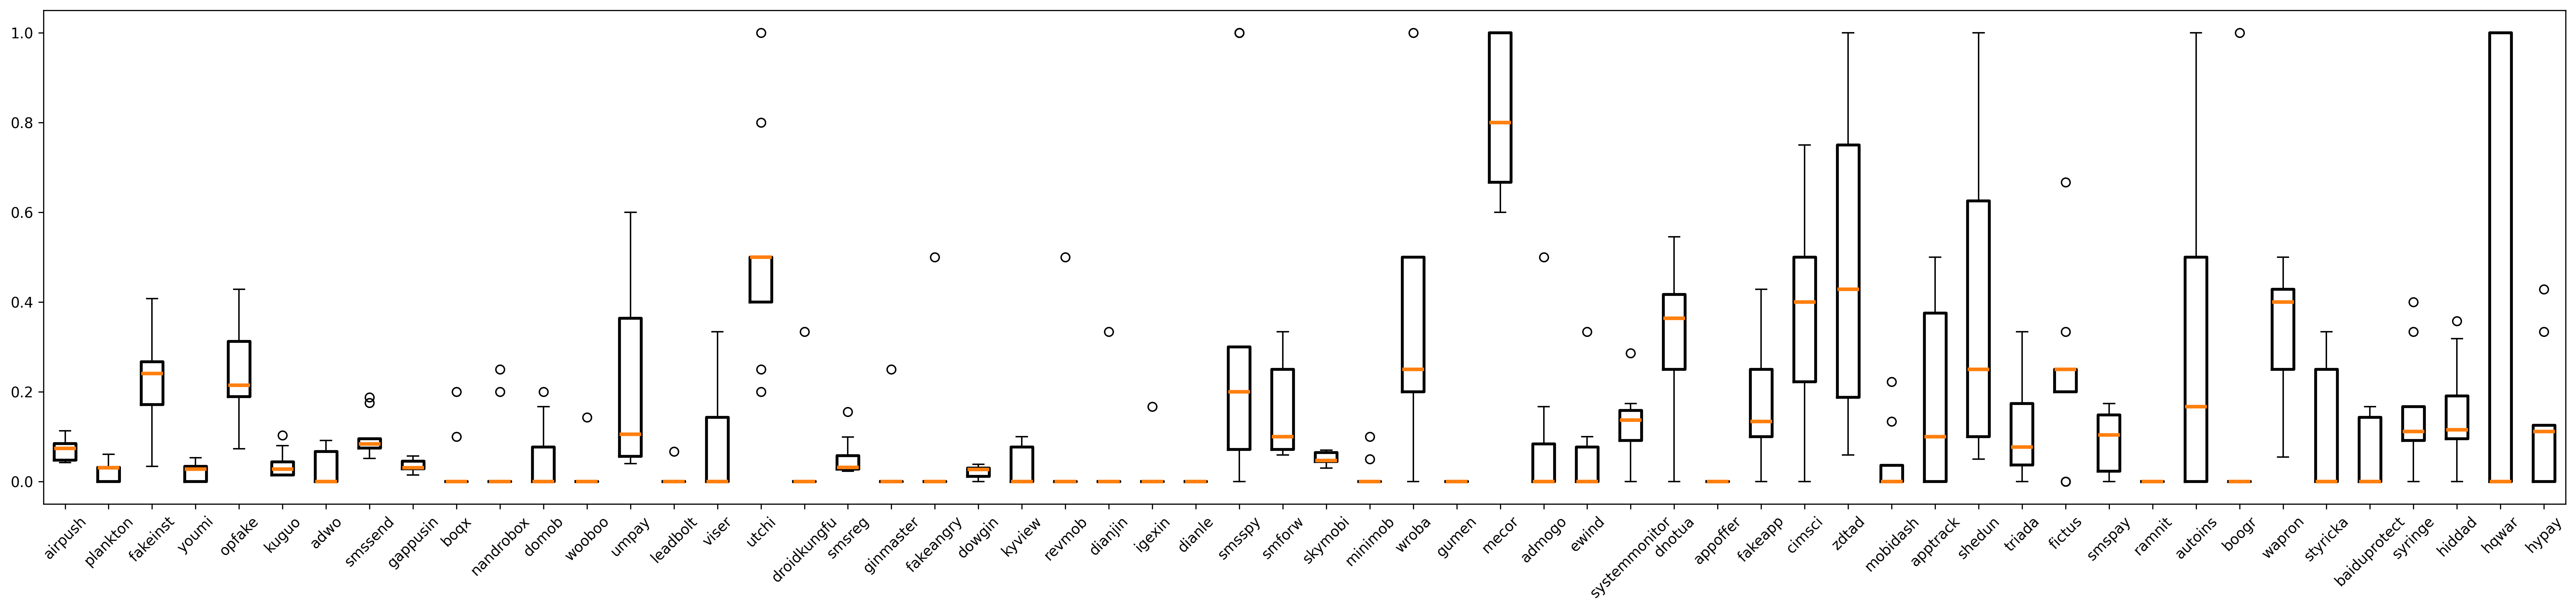

In [28]:
import matplotlib.pyplot as plt

# Prepare data for the box plot
jaccard_values = list(jaccard_results.values())

# Create the box plot
plt.figure(figsize=(25, 6), dpi=300)
plt.boxplot(jaccard_values, labels=jaccard_results.keys(), vert=True, boxprops=dict(linewidth=2), medianprops=dict(linewidth=2.5))
# plt.title("Jaccard Similarity Box Plot")
# plt.xlabel("Families")
# plt.ylabel("Jaccard Similarity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("/home/ihossain/ISMAIL/AZ-Data-Processor/Concept-Drift/experiment/plots/jaccard_similarity_boxplot.png", dpi=300, bbox_inches='tight')
plt.savefig("/home/ihossain/ISMAIL/AZ-Data-Processor/Concept-Drift/experiment/plots/jaccard_similarity_boxplot.pdf", format="pdf", dpi=300, bbox_inches='tight')
plt.close()  # Ensure the figure is closed after saving to avoid blank output

## Lambda and API Graph combined stability analysis

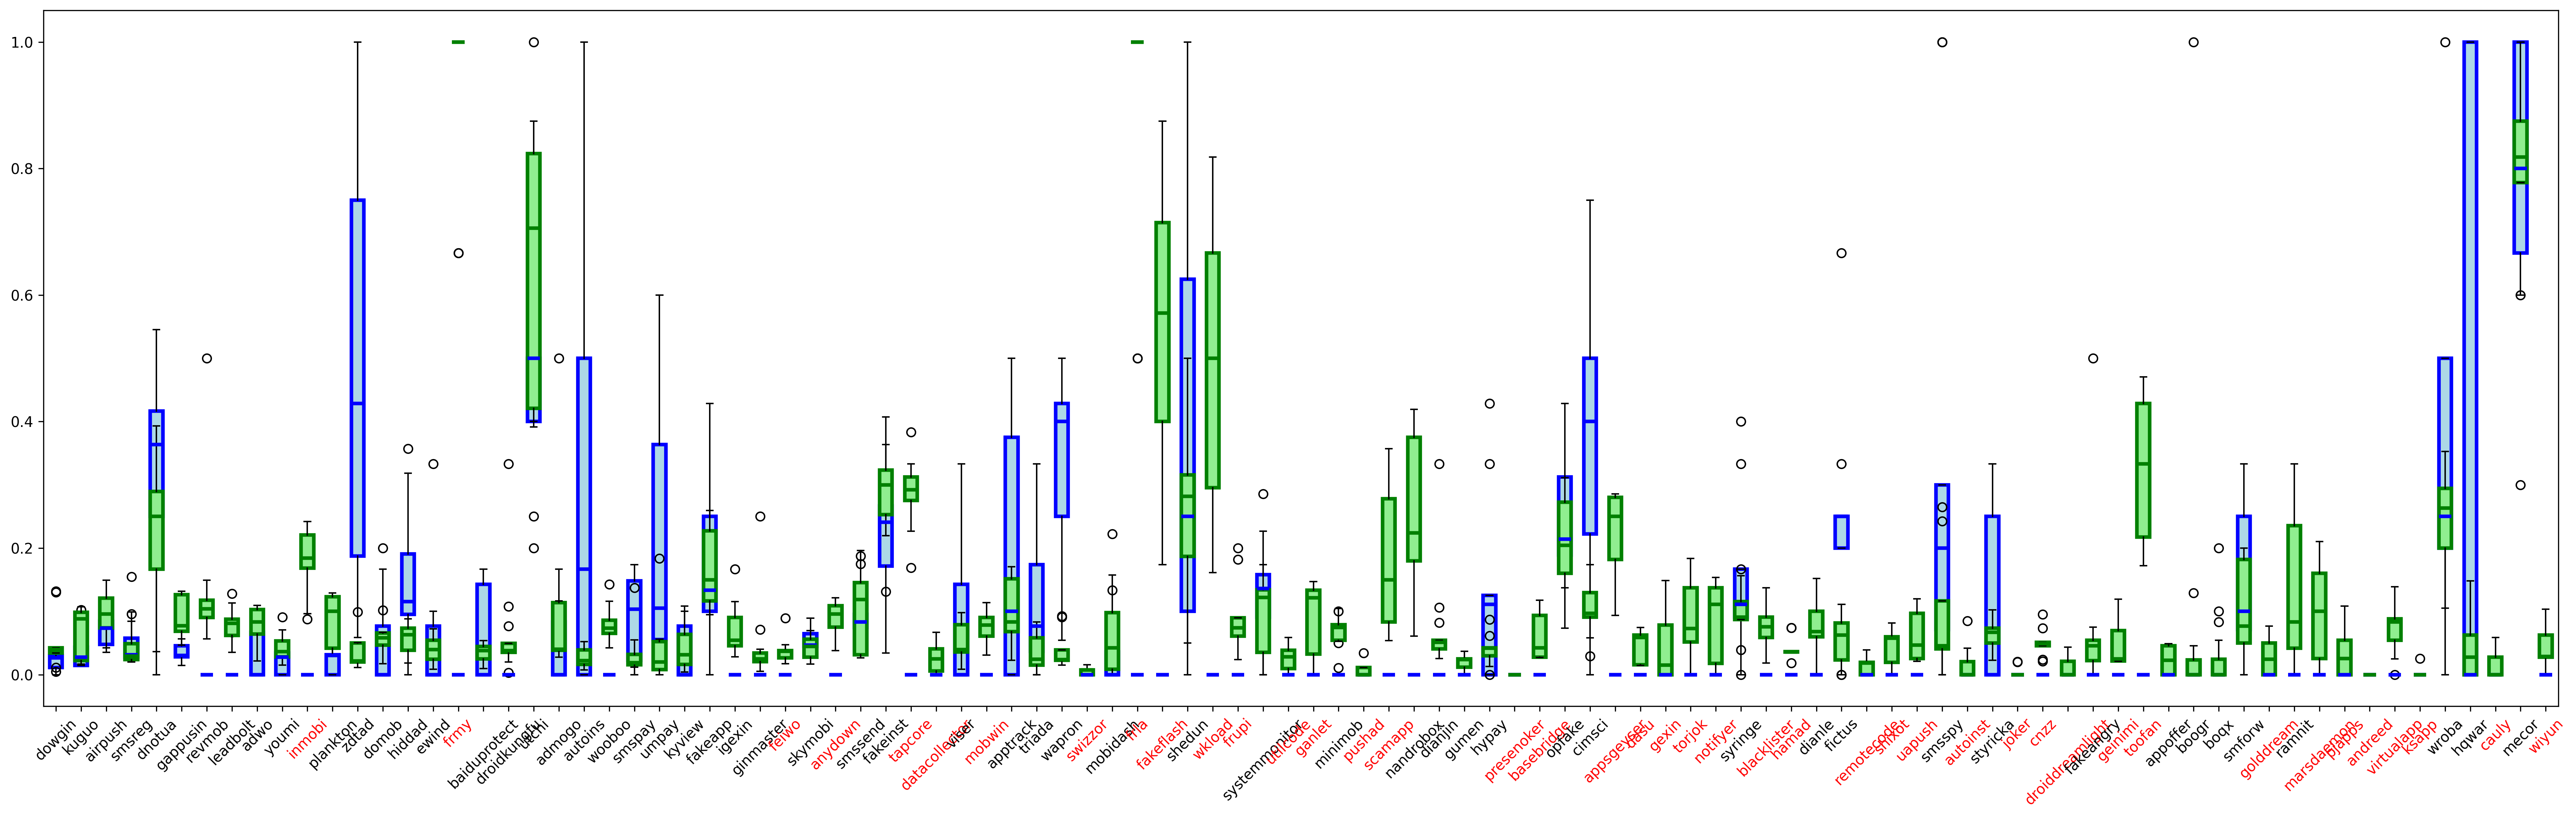

In [29]:
import json
import matplotlib.pyplot as plt
import numpy as np

# File paths
file1 = '/home/ihossain/ISMAIL/Datasets/data/results/apiGraph_feature_space_jaccard_score.json'
file2 = '/home/ihossain/ISMAIL/Datasets/data/results/lamda_feature_space_jaccard_scores.json'

# Load data from both JSON files
with open(file1, 'r') as f1, open(file2, 'r') as f2:
    data1 = json.load(f1)
    data2 = json.load(f2)

# Find common families in both results
common_families = set(data1.keys()).intersection(set(data2.keys()))

# Convert keys to a list for indexing
data2_keys = list(data2.keys())

# Prepare data for box plots
data1_values = [data1[family] if family in common_families else [0] for family in data2_keys]
data2_values = [data2[family] for family in data2_keys]

# Create box plots
plt.figure(figsize=(25, 8), dpi=300)

# Plot the boxplots for data1 and data2
plt.boxplot(data1_values, positions=np.arange(len(data2_keys)), widths=0.5, 
           patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue',linewidth=2.5), 
           medianprops=dict(color='blue', linewidth=2.5))

plt.boxplot(data2_values, positions=np.arange(len(data2_keys)), widths=0.5, 
           patch_artist=True, boxprops=dict(facecolor='lightgreen', color='green',linewidth=2.5), 
           medianprops=dict(color='green', linewidth=2.5))

# Create labels with different colors
# labels = [f"{label}" if label in common_families else f"{label} (not common)" 
#          for label in data2_keys]

# Set x-axis ticks and labels
plt.xticks(np.arange(len(data2_keys)), data2_keys, rotation=45)

# Color the labels individually
ax = plt.gca()
for i, label in enumerate(ax.get_xticklabels()):
    label.set_color('black' if data2_keys[i] in common_families else 'red')

# Customize the plot
# plt.xlabel("Families")
# plt.ylabel("Jaccard Similarity")
plt.tight_layout()
plt.show()

In [30]:
from sentence_transformers import SentenceTransformer
import numpy as np
import ot

# Initialize the SentenceTransformer model
# model = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight but effective

def calculate_ot(family_data_splits, family):
    """
    Calculate the Optimal Transport (OT) distance between two sets of features for a given family and years.

    Args:
        family_features (dict): Dictionary containing features for each family and year.
        family (str): The family name to calculate OT distance for.
        year1 (int): The first year to compare.
        year2 (int): The second year to compare.

    Returns:
        float: The OT distance between the two sets of features.
    """
    ot_distance = []
    for i in range(len(family_data_splits[family])-1):
        # Extract features for the specified family and years
        A = family_data_splits[family][i]
        B = family_data_splits[family][i+1]

        # Convert features to embeddings
        # embeddings1 = model.encode(features1)
        # embeddings2 = model.encode(features2)

        # Uniform weights for OT calculation
        a = np.ones((len(A),)) / len(A)
        b = np.ones((len(B),)) / len(B)

        # Compute the ground cost matrix (Euclidean distance between embeddings)
        cost_matrix = ot.dist(A, B, metric='hamming')

        # Compute the OT distance
        ot_distance.append(ot.emd2(a, b, cost_matrix))

    return ot_distance

# Example usage
# family = 'droidkungfu'
# year1 = 2012
# year2 = 2013
# ot_distance = calculate_ot(family_features, family, year1, year2)
# print(f"Optimal Transport Distance between {family} in {year1} and {year2}: {ot_distance}")


In [31]:
family_data_splits['airpush'][0]

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [32]:
otd_results = {}
for family in family_data_splits.keys():
    # Example usage
    # family = 'droidkungfu'  # Replace with the desired family name
    otd_results[family] = calculate_ot(family_data_splits, family)
    # print(jaccard_results)

In [33]:
for family in family_data_splits.keys():
    print(otd_results[family])

[0.019736419157827076, 0.011551540374562252, 0.012952342282901076, 0.010902639098752956, 0.013132417981833355, 0.011080689978463646, 0.01305428926647326, 0.014678007785696333, 0.011152024892488089]
[0.01734707778938286, 0.021661141637527817, 0.019864876456311888, 0.015482695810564662, 0.014955421340235834, 0.01720832134982264, 0.01802320007669447, 0.017400057520851303, 0.019461221359409447]
[0.006738496423961951, 0.00628213264498463, 0.003950398961772399, 0.005583325608425618, 0.009543588683129036, 0.01665947656025309, 0.022102387115329306, 0.006859361518550468, 0.021045441472533795]
[0.027420610703087187, 0.02314284812390833, 0.013524590163934425, 0.010893011216566006, 0.01949956859361519, 0.01466781708369284, 0.019499568593615187, 0.020664365832614322, 0.022713546160483173]
[0.004387494722155929, 0.01061076129458631, 0.004956583995741008, 0.007912176674682869, 0.011143135131165898, 0.013502900120442595, 0.018006527366170234, 0.012904677945755335, 0.012904677945755335]
[0.012715135552

In [34]:
import pandas as pd
# Convert to DataFrame for easier plotting
df = pd.DataFrame(otd_results).T  # Transpose to get families as rows

In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import glob
 
# Global font settings
plt.rcParams.update({
    "font.size": 14,
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
    "legend.frameon": False
})

In [41]:
len(data1.keys())

58

## Optimal Transport Dataset Distance analysis

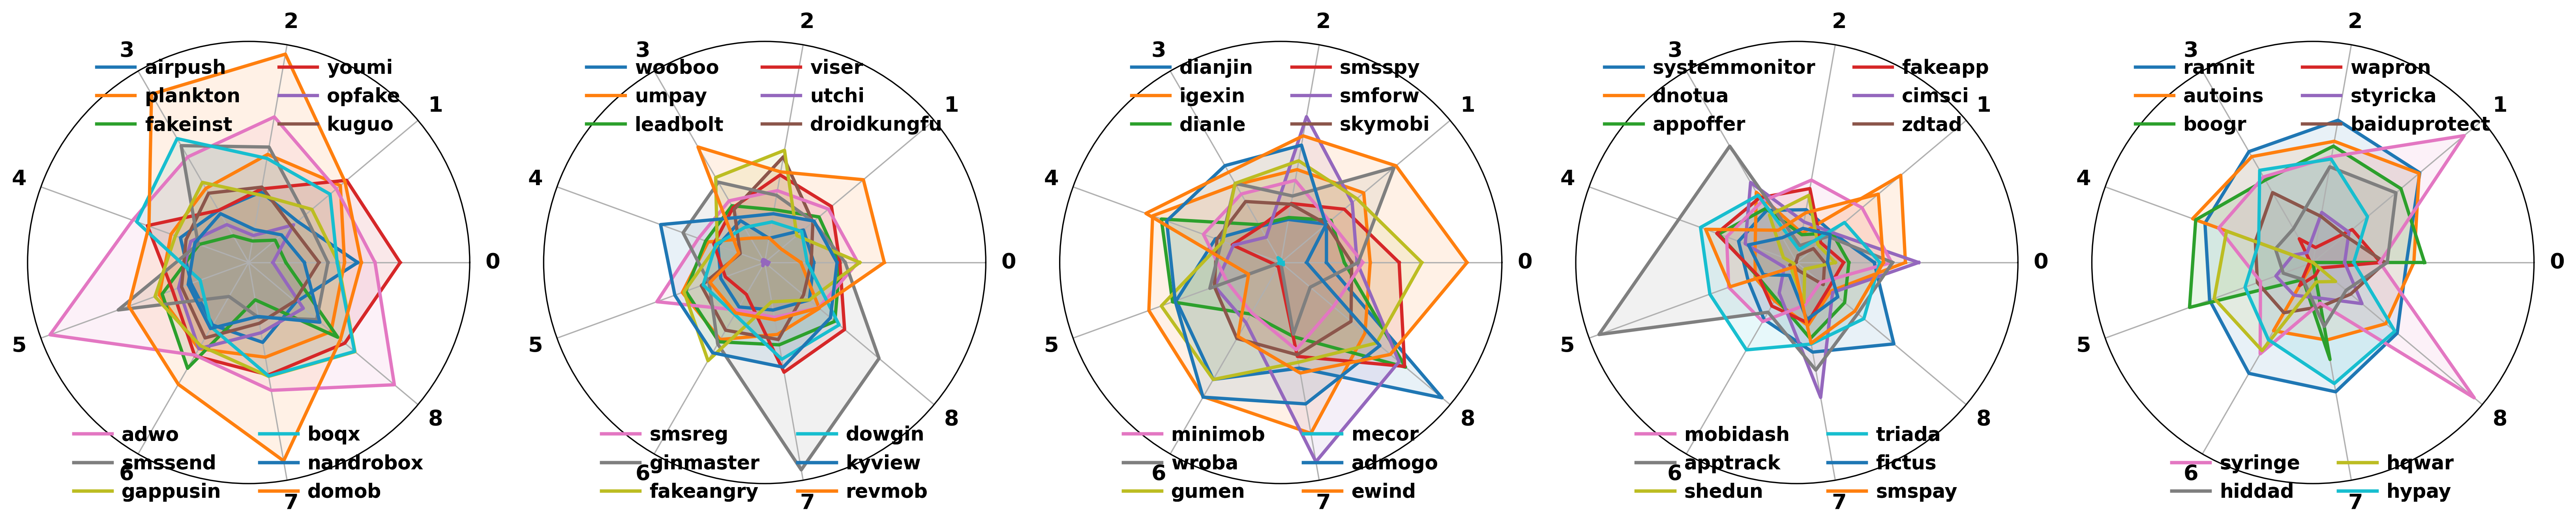

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming family_data_splits and df are already loaded
families = list(data1.keys())

# Group families
grouped_families = [families[i:i + 12] for i in range(0, len(families), 12)]

# Feature labels
labels = df.columns.tolist()
num_features = len(labels)

# Create angle values
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # close the circle

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(22, 10), subplot_kw={'projection': 'polar'}, dpi=300)
axes = axes.flatten()

for idx, families in enumerate(grouped_families[0:5]):  # Limit to 5 groups
    ax = axes[idx]
    handle_list = []
    label_list = []

    for family in families:
        if family in df.index:
            values = df.loc[family].tolist()
            values += values[:1]
            line, = ax.plot(angles, values, label=family, linewidth=2)
            ax.fill(angles, values, alpha=0.1)
            handle_list.append(line)
            label_list.append(family)

    ax.set_xticks(angles[:-1])

    # Show 6 feature labels on top and bottom only
    new_labels = []
    for i, lbl in enumerate(labels):
        if i < 6 or i >= (num_features - 6):
            new_labels.append(lbl)
        else:
            new_labels.append('')
    ax.set_xticklabels(new_labels)

    ax.set_yticks([])

    # Split families into two groups: first 6 and last 6
    handles_upper = handle_list[:6]
    labels_upper = label_list[:6]
    handles_lower = handle_list[6:]
    labels_lower = label_list[6:]

    # Add upper center legend (first 6 families)
    leg1 = ax.legend(handles=handles_upper, labels=labels_upper,
                     loc='upper center', bbox_to_anchor=(0.5, 1.0),
                     ncol=2, frameon=False, fontsize='small', handletextpad=0.5)

    # Add lower center legend (last 6 families)
    leg2 = ax.legend(handles=handles_lower, labels=labels_lower,
                     loc='lower center', bbox_to_anchor=(0.5, -0.08),
                     ncol=2, frameon=False, fontsize='small', handletextpad=0.5)

    # Set legends manually to not interfere with tight_layout
    ax.add_artist(leg1)
    ax.add_artist(leg2)

# Layout adjustment
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


In [39]:
list(family_data_splits.keys())

['airpush',
 'plankton',
 'fakeinst',
 'youmi',
 'opfake',
 'kuguo',
 'adwo',
 'smssend',
 'gappusin',
 'boqx',
 'nandrobox',
 'domob',
 'wooboo',
 'umpay',
 'leadbolt',
 'viser',
 'utchi',
 'droidkungfu',
 'smsreg',
 'ginmaster',
 'fakeangry',
 'dowgin',
 'kyview',
 'revmob',
 'dianjin',
 'igexin',
 'dianle',
 'smsspy',
 'smforw',
 'skymobi',
 'minimob',
 'wroba',
 'gumen',
 'mecor',
 'admogo',
 'ewind',
 'systemmonitor',
 'dnotua',
 'appoffer',
 'fakeapp',
 'cimsci',
 'zdtad',
 'mobidash',
 'apptrack',
 'shedun',
 'triada',
 'fictus',
 'smspay',
 'ramnit',
 'autoins',
 'boogr',
 'wapron',
 'styricka',
 'baiduprotect',
 'syringe',
 'hiddad',
 'hqwar',
 'hypay']

In [40]:
# Save the keys of family_data_splits to a text file
with open('/home/ihossain/ISMAIL/Datasets/data/CDD/results/lambda-apigraph-common-60-families.txt', 'w') as file:
    for key in family_data_splits.keys():
        file.write(f"{key}\n")